<a href="https://colab.research.google.com/github/eoinleen/basic_plotting/blob/main/plotting_ipTM_versus_pTM_colabfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 UPLOAD YOUR .TXT DATA FILE
Click the button below to upload your .txt file containing the data.
Expected format: Space or tab-separated columns
Comments (lines starting with #) will be automatically skipped.



Saving all_predictions_scatter_data_all_hits.txt to all_predictions_scatter_data_all_hits.txt
✅ Successfully uploaded: all_predictions_scatter_data_all_hits.txt
📊 File size: 1365131 bytes
📋 Total lines: 28844
💬 Comment lines: 3
📈 Potential data lines: 28841

📖 File preview (first 10 lines):
----------------------------------------
 1: # Complete ColabFold Dataset for Scatter Plotting (ALL HITS)
 2: # Format: Directory Sequence_ID Rank pTM ipTM Quality
 3: # Generated: Mon 15 Sep 18:31:03 BST 2025
 4: 
 5: 1 1_dir1_n0-8_20250705_15_0 1 0.61 0.27 Failed
 6: 1 1_dir1_n0-8_20250705_15_1 1 0.57 0.2 Failed
 7: 1 1_dir1_n0-8_20250705_15_10 1 0.6 0.25 Failed
 8: 1 1_dir1_n0-8_20250705_15_11 1 0.58 0.18 Failed
 9: 1 1_dir1_n0-8_20250705_15_12 1 0.59 0.22 Failed
10: 1 1_dir1_n0-8_20250705_15_13 1 0.6 0.21 Failed
... and 28834 more lines
----------------------------------------

🎨 CREATING PLOT...

📊 DATA PARSING RESULTS
✅ Successfully parsed: 28840 data points
📏 X range: 0.440 to 0.840
📏 Y range

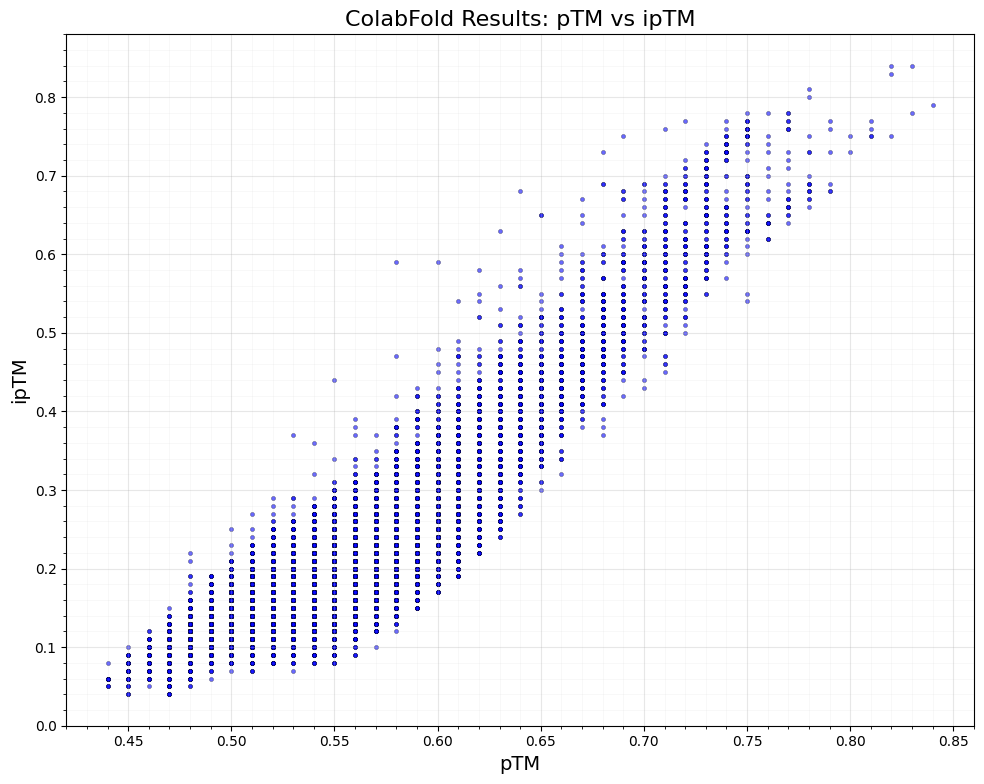


✅ Plot created successfully with 28840 points!

📈 DATA STATISTICS:
🔢 pTM: min=0.440, max=0.840, mean=0.547, std=0.047
🔢 ipTM: min=0.040, max=0.840, mean=0.195, std=0.096
📊 Correlation coefficient: 0.869

🎛️  QUICK CUSTOMIZATION REFERENCE
📍 Column indices (0-based): Column 1=0, Column 2=1, Column 3=2, etc.
🎯 Common marker styles: 'o' (circle), 's' (square), '^' (triangle up),
                        'v' (triangle down), 'D' (diamond), '*' (star)
🎨 Common colors: 'red', 'blue', 'green', 'orange', 'purple', 'brown',
                  'pink', 'gray', 'olive', 'cyan', or hex codes like '#FF5733'
📏 Tick spacing: Set to specific values (e.g., 0.1) or None for automatic
🔄 To modify: Change values in the 'PLOTTING PARAMETERS' section above
   Then run this cell again (you won't need to re-upload the file)

💡 TIP: Your file is now loaded in memory.
   You can modify the parameters above and run this cell again
   without having to re-upload the file!


In [1]:
# Interactive Scatter Plot for Google Colab with File Upload
# Upload .txt file and customize plotting parameters

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ========================================
# PLOTTING PARAMETERS - MODIFY HERE
# ========================================

# Data parameters
DATA_START_ROW = 4  # Row where data starts (0-indexed, so row 5 in your file)
X_COLUMN = 3        # Column index for X-axis (0-indexed, so column 4 = pTM)
Y_COLUMN = 4        # Column index for Y-axis (0-indexed, so column 5 = ipTM)

# Axis labels
X_LABEL = "pTM"
Y_LABEL = "ipTM"
PLOT_TITLE = "ColabFold Results: pTM vs ipTM"

# Font settings
FONT_SIZE = 12
TITLE_FONT_SIZE = 16
LABEL_FONT_SIZE = 14
TICK_FONT_SIZE = 10

# Grid settings
SHOW_GRID = True
GRID_ALPHA = 0.3
MAJOR_GRID_LINEWIDTH = 0.8
MINOR_GRID_LINEWIDTH = 0.4

# Marker settings
MARKER_STYLE = 'o'      # Options: 'o', 's', '^', 'v', '<', '>', 'D', 'p', '*', etc.
MARKER_SIZE = 3         # Size of markers
MARKER_COLOR = 'blue'   # Color name or hex code (e.g., '#FF5733')
MARKER_ALPHA = 0.6      # Transparency (0.0 to 1.0)
MARKER_EDGE_COLOR = 'black'
MARKER_EDGE_WIDTH = 0.3

# Plot appearance
FIGURE_SIZE = (10, 8)   # Width, Height in inches
DPI = 100
BACKGROUND_TRANSPARENT = True

# Tick settings
MAJOR_TICK_SPACING_X = None  # Set to None for automatic, or specify value (e.g., 0.1)
MINOR_TICK_SPACING_X = None  # Set to None for automatic, or specify value (e.g., 0.05)
MAJOR_TICK_SPACING_Y = None  # Set to None for automatic, or specify value (e.g., 0.1)
MINOR_TICK_SPACING_Y = None  # Set to None for automatic, or specify value (e.g., 0.05)

# Axis limits (set to None for automatic)
X_MIN = None
X_MAX = None
Y_MIN = None
Y_MAX = None

# ========================================
# FILE UPLOAD SECTION
# ========================================

print("📁 UPLOAD YOUR .TXT DATA FILE")
print("=" * 40)
print("Click the button below to upload your .txt file containing the data.")
print("Expected format: Space or tab-separated columns")
print("Comments (lines starting with #) will be automatically skipped.")
print()

# Upload file
uploaded = files.upload()

# Process the uploaded file
uploaded_data = None
filename = None

for filename, content in uploaded.items():
    print(f"✅ Successfully uploaded: {filename}")

    # Decode the file content
    try:
        uploaded_data = content.decode('utf-8')
        print(f"📊 File size: {len(content)} bytes")

        # Count lines for user info
        lines = uploaded_data.strip().split('\n')
        total_lines = len(lines)
        comment_lines = sum(1 for line in lines if line.strip().startswith('#'))
        data_lines = total_lines - comment_lines

        print(f"📋 Total lines: {total_lines}")
        print(f"💬 Comment lines: {comment_lines}")
        print(f"📈 Potential data lines: {data_lines}")

        # Show first few lines as preview
        print("\n📖 File preview (first 10 lines):")
        print("-" * 40)
        for i, line in enumerate(lines[:10]):
            print(f"{i+1:2d}: {line}")
        if len(lines) > 10:
            print(f"... and {len(lines)-10} more lines")
        print("-" * 40)

    except UnicodeDecodeError:
        print(f"❌ Error: Could not decode {filename}. Please ensure it's a text file.")
        uploaded_data = None

    break  # Process only the first file if multiple are uploaded

# ========================================
# PLOTTING FUNCTION
# ========================================

def create_scatter_plot(data_string):
    """Create customizable scatter plot based on parameters above"""

    if data_string is None:
        print("❌ No valid data found. Please upload a .txt file first.")
        return 0

    # Parse the data
    lines = data_string.strip().split('\n')

    # Skip comment lines and header lines
    data_lines = []
    for i, line in enumerate(lines):
        if i >= DATA_START_ROW and not line.strip().startswith('#'):
            data_lines.append(line.strip())

    # Parse data into lists
    data_rows = []
    for line in data_lines:
        if line.strip():  # Skip empty lines
            # Handle both space and tab separation
            parts = line.replace('\t', ' ').split()
            if len(parts) >= max(X_COLUMN, Y_COLUMN) + 1:
                data_rows.append(parts)

    # Extract X and Y values
    x_values = []
    y_values = []
    failed_rows = 0

    for row in data_rows:
        try:
            x_val = float(row[X_COLUMN])
            y_val = float(row[Y_COLUMN])
            x_values.append(x_val)
            y_values.append(y_val)
        except (ValueError, IndexError):
            failed_rows += 1
            continue  # Skip rows with invalid data

    print(f"\n📊 DATA PARSING RESULTS")
    print("=" * 30)
    print(f"✅ Successfully parsed: {len(x_values)} data points")
    if failed_rows > 0:
        print(f"⚠️  Skipped rows with invalid data: {failed_rows}")
    print(f"📏 X range: {min(x_values):.3f} to {max(x_values):.3f}")
    print(f"📏 Y range: {min(y_values):.3f} to {max(y_values):.3f}")

    if len(x_values) == 0:
        print("❌ No valid data points found. Please check:")
        print(f"   - DATA_START_ROW is set correctly (currently: {DATA_START_ROW})")
        print(f"   - X_COLUMN and Y_COLUMN are correct (currently: {X_COLUMN}, {Y_COLUMN})")
        print("   - Your data contains numeric values in those columns")
        return 0

    # Create the plot
    plt.figure(figsize=FIGURE_SIZE, dpi=DPI)

    # Set font sizes
    plt.rcParams.update({
        'font.size': FONT_SIZE,
        'axes.titlesize': TITLE_FONT_SIZE,
        'axes.labelsize': LABEL_FONT_SIZE,
        'xtick.labelsize': TICK_FONT_SIZE,
        'ytick.labelsize': TICK_FONT_SIZE
    })

    # Create scatter plot
    plt.scatter(x_values, y_values,
               s=MARKER_SIZE**2,  # matplotlib uses area, so square the size
               c=MARKER_COLOR,
               marker=MARKER_STYLE,
               alpha=MARKER_ALPHA,
               edgecolors=MARKER_EDGE_COLOR,
               linewidths=MARKER_EDGE_WIDTH)

    # Set labels and title
    plt.xlabel(X_LABEL)
    plt.ylabel(Y_LABEL)
    plt.title(PLOT_TITLE)

    # Set axis limits if specified
    if X_MIN is not None or X_MAX is not None:
        plt.xlim(X_MIN, X_MAX)
    if Y_MIN is not None or Y_MAX is not None:
        plt.ylim(Y_MIN, Y_MAX)

    # Configure grid
    if SHOW_GRID:
        plt.grid(True, alpha=GRID_ALPHA, linewidth=MAJOR_GRID_LINEWIDTH)
        plt.grid(True, which='minor', alpha=GRID_ALPHA/2, linewidth=MINOR_GRID_LINEWIDTH)

    # Set tick spacing if specified
    current_xlim = plt.xlim()
    current_ylim = plt.ylim()

    if MAJOR_TICK_SPACING_X is not None:
        start_x = np.ceil(current_xlim[0] / MAJOR_TICK_SPACING_X) * MAJOR_TICK_SPACING_X
        end_x = np.floor(current_xlim[1] / MAJOR_TICK_SPACING_X) * MAJOR_TICK_SPACING_X
        plt.gca().set_xticks(np.arange(start_x, end_x + MAJOR_TICK_SPACING_X, MAJOR_TICK_SPACING_X))

    if MINOR_TICK_SPACING_X is not None:
        start_x = np.ceil(current_xlim[0] / MINOR_TICK_SPACING_X) * MINOR_TICK_SPACING_X
        end_x = np.floor(current_xlim[1] / MINOR_TICK_SPACING_X) * MINOR_TICK_SPACING_X
        plt.gca().set_xticks(np.arange(start_x, end_x + MINOR_TICK_SPACING_X, MINOR_TICK_SPACING_X), minor=True)

    if MAJOR_TICK_SPACING_Y is not None:
        start_y = np.ceil(current_ylim[0] / MAJOR_TICK_SPACING_Y) * MAJOR_TICK_SPACING_Y
        end_y = np.floor(current_ylim[1] / MAJOR_TICK_SPACING_Y) * MAJOR_TICK_SPACING_Y
        plt.gca().set_yticks(np.arange(start_y, end_y + MAJOR_TICK_SPACING_Y, MAJOR_TICK_SPACING_Y))

    if MINOR_TICK_SPACING_Y is not None:
        start_y = np.ceil(current_ylim[0] / MINOR_TICK_SPACING_Y) * MINOR_TICK_SPACING_Y
        end_y = np.floor(current_ylim[1] / MINOR_TICK_SPACING_Y) * MINOR_TICK_SPACING_Y
        plt.gca().set_yticks(np.arange(start_y, end_y + MINOR_TICK_SPACING_Y, MINOR_TICK_SPACING_Y), minor=True)

    # Enable minor ticks
    plt.gca().minorticks_on()

    # Set transparent background if requested
    if BACKGROUND_TRANSPARENT:
        plt.gca().patch.set_alpha(0.0)
        plt.gcf().patch.set_alpha(0.0)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

    return len(x_values)

# ========================================
# RUN THE PLOT (Only if file was uploaded)
# ========================================

if uploaded_data is not None:
    print(f"\n🎨 CREATING PLOT...")
    print("=" * 30)
    num_points = create_scatter_plot(uploaded_data)

    if num_points > 0:
        print(f"\n✅ Plot created successfully with {num_points} points!")

        # Display data statistics
        print(f"\n📈 DATA STATISTICS:")
        print("=" * 30)

        # Parse data for statistics
        lines = uploaded_data.strip().split('\n')
        data_lines = []
        for i, line in enumerate(lines):
            if i >= DATA_START_ROW and not line.strip().startswith('#'):
                data_lines.append(line.strip())

        x_vals, y_vals = [], []
        for line in data_lines:
            if line.strip():
                parts = line.replace('\t', ' ').split()
                if len(parts) >= max(X_COLUMN, Y_COLUMN) + 1:
                    try:
                        x_vals.append(float(parts[X_COLUMN]))
                        y_vals.append(float(parts[Y_COLUMN]))
                    except ValueError:
                        continue

        if x_vals and y_vals:
            print(f"🔢 {X_LABEL}: min={min(x_vals):.3f}, max={max(x_vals):.3f}, mean={np.mean(x_vals):.3f}, std={np.std(x_vals):.3f}")
            print(f"🔢 {Y_LABEL}: min={min(y_vals):.3f}, max={max(y_vals):.3f}, mean={np.mean(y_vals):.3f}, std={np.std(y_vals):.3f}")

            # Correlation coefficient
            correlation = np.corrcoef(x_vals, y_vals)[0, 1]
            print(f"📊 Correlation coefficient: {correlation:.3f}")

else:
    print("\n⏸️  No file uploaded. Please run this cell again and upload a .txt file.")

# ========================================
# QUICK REFERENCE FOR CUSTOMIZATION
# ========================================

print("\n" + "="*60)
print("🎛️  QUICK CUSTOMIZATION REFERENCE")
print("="*60)
print("📍 Column indices (0-based): Column 1=0, Column 2=1, Column 3=2, etc.")
print("🎯 Common marker styles: 'o' (circle), 's' (square), '^' (triangle up),")
print("                        'v' (triangle down), 'D' (diamond), '*' (star)")
print("🎨 Common colors: 'red', 'blue', 'green', 'orange', 'purple', 'brown',")
print("                  'pink', 'gray', 'olive', 'cyan', or hex codes like '#FF5733'")
print("📏 Tick spacing: Set to specific values (e.g., 0.1) or None for automatic")
print("🔄 To modify: Change values in the 'PLOTTING PARAMETERS' section above")
print("   Then run this cell again (you won't need to re-upload the file)")
print("="*60)

# Instructions for re-running
if uploaded_data is not None:
    print("\n💡 TIP: Your file is now loaded in memory.")
    print("   You can modify the parameters above and run this cell again")
    print("   without having to re-upload the file!")